<a href="https://colab.research.google.com/github/APURVSAXENA/Additional-Projects/blob/master/Predicting%20the%20price%20of%20used%20Toyota%20Corolla%20using%20Artificial%20Neural%20Network%20(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Predicting the price of used Toyota Corolla using Artificial Neural Network (ANN) </h1>

## 1. Data

We use the full Toyota Corolla dataset to show how to use artificial neural network models for prediction. Compared to the simplified version, the full dataset contains many columns.

In [ ]:
# Import modules
import pandas as pd

# Import the matplotlib.pyplot
import matplotlib.pyplot as plt

# Enable inline plotting in notebook
%matplotlib inline

### 1.1. Import Data

In [ ]:
dat = pd.read_excel("../Data/ToyotaCorolla_FullData.xls", sheet_name='data')
dat.head(2).transpose()

,0,1
Id,1,2
Model,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
Price,13500,13750
Age_08_04,23,23
Mfg_Month,10,10
Mfg_Year,2002,2002
KM,46986,72937
Fuel_Type,Diesel,Diesel
HP,90,90
Met_Color,1,1


In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [ ]:
# Get the descriptive summary
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
Mfg_Month,1436.0,5.548747,3.354085,1.0,3.00,5.0,8.00,12.0
Mfg_Year,1436.0,1999.625348,1.540722,1998.0,1998.00,1999.0,2001.00,2004.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.00,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.00,0.0,0.00,1.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0


### 1.2. Data Transformation

The categorical/string columns cannot be directly used as input for most algorithms. Let's create dummies for them.

In [ ]:
# Create y
y = dat['Price'].copy()

In [ ]:
# Convert Fuel_Type and Color into dummies and drop ID and Model
X = pd.get_dummies(data=dat.drop(['Id','Model','Price'], axis=1),
                   columns=['Fuel_Type','Color'],
                   prefix = ['Fuel_Type','Color'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age_08_04          1436 non-null   int64
 1   Mfg_Month          1436 non-null   int64
 2   Mfg_Year           1436 non-null   int64
 3   KM                 1436 non-null   int64
 4   HP                 1436 non-null   int64
 5   Met_Color          1436 non-null   int64
 6   Automatic          1436 non-null   int64
 7   CC                 1436 non-null   int64
 8   Doors              1436 non-null   int64
 9   Cylinders          1436 non-null   int64
 10  Gears              1436 non-null   int64
 11  Quarterly_Tax      1436 non-null   int64
 12  Weight             1436 non-null   int64
 13  Mfr_Guarantee      1436 non-null   int64
 14  BOVAG_Guarantee    1436 non-null   int64
 15  Guarantee_Period   1436 non-null   int64
 16  ABS                1436 non-null   int64
 17  Airbag_1      

In [ ]:
X.shape

(1436, 47)

In [ ]:
y.shape

(1436,)

### 1.3. Data Partition

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 30-70% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.3,
                                                 random_state=123)

In [ ]:
train_y.shape

(1005,)

In [ ]:
train_X.shape

(1005, 47)

In [ ]:
test_y.shape

(431,)

In [ ]:
test_X.shape

(431, 47)

### 1.4. Data Normalization

Also, it's usually recommended to normalize data before apply the neural network model. We normalize the predictor variables to the range of [0, 1]. We can the sklearn.preprocessing module to normalize variables.

Here we train the normalizer (scaler) by the training dataset. Then apply the normalizer to transform both the training and test sets.

In [ ]:
from sklearn import preprocessing

In [ ]:
train_scale = preprocessing.MinMaxScaler().fit(train_X)

c:\users\chenla\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
train_X_scale = pd.DataFrame(train_scale.transform(train_X),columns=train_X.columns)
train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age_08_04,1005.0,0.696173,0.234387,0.0,0.538462,0.756410,0.871795,1.0
Mfg_Month,1005.0,0.419810,0.304760,0.0,0.181818,0.363636,0.636364,1.0
Mfg_Year,1005.0,0.265008,0.253304,0.0,0.000000,0.166667,0.500000,1.0
KM,1005.0,0.296967,0.161147,0.0,0.187212,0.273179,0.380718,1.0
HP,1005.0,0.265041,0.122945,0.0,0.170732,0.333333,0.333333,1.0
Met_Color,1005.0,0.672637,0.469485,0.0,0.000000,1.000000,1.000000,1.0
Automatic,1005.0,0.057711,0.233313,0.0,0.000000,0.000000,0.000000,1.0
CC,1005.0,0.019410,0.033492,0.0,0.006803,0.020408,0.020408,1.0
Doors,1005.0,0.670978,0.316793,0.0,0.333333,0.666667,1.000000,1.0
Cylinders,1005.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [ ]:
test_X_scale = pd.DataFrame(train_scale.transform(test_X),columns=train_X.columns)
test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age_08_04,431.0,0.681034,0.247656,-0.012821,0.525641,0.756410,0.858974,1.000000
Mfg_Month,431.0,0.398861,0.305132,0.000000,0.181818,0.363636,0.636364,1.000000
Mfg_Year,431.0,0.284609,0.264522,0.000000,0.000000,0.166667,0.500000,1.000000
KM,431.0,0.287770,0.160706,0.000000,0.168259,0.268654,0.361640,1.043187
HP,431.0,0.262388,0.119200,0.000000,0.138211,0.333333,0.333333,1.000000
Met_Color,431.0,0.679814,0.467090,0.000000,0.000000,1.000000,1.000000,1.000000
Automatic,431.0,0.051044,0.220343,0.000000,0.000000,0.000000,0.000000,1.000000
CC,431.0,0.017489,0.012644,0.000000,0.006803,0.020408,0.020408,0.047619
Doors,431.0,0.693735,0.319139,0.000000,0.333333,0.666667,1.000000,1.000000
Cylinders,431.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


We notice that some variables in the normalized test dataset are not necessarily in the range of [0, 1].

Now, let's normalize y.

In [ ]:
train_scale_y = preprocessing.MinMaxScaler().fit(train_y.values.reshape(-1,1).astype(float))

In [ ]:
train_y_scale = train_scale_y.transform(train_y.values.reshape(-1,1))
train_y_scale = pd.Series(train_y_scale.reshape(train_y.shape[0],))
train_y_scale.describe()

count    1005.000000
mean        0.224881
std         0.127351
min         0.000000
25%         0.145648
50%         0.197158
75%         0.268028
max         1.000000
dtype: float64

In [ ]:
test_y_scale = train_scale_y.transform(test_y.values.reshape(-1,1))
test_y_scale = pd.Series(test_y_scale.reshape(test_y.shape[0],))
test_y_scale.describe()

count    431.000000
mean       0.230849
std        0.132317
min        0.049378
25%        0.145648
50%        0.197158
75%        0.270693
max        0.946714
dtype: float64

### 1.5. Feature Selection

As random forests provide the importance score for all predictors, let's use random forests to select features for ANN models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train an RF regressor
rf = RandomForestRegressor(n_estimators=50, max_features=30, random_state=123)

In [ ]:
rf.fit(train_X_scale,train_y_scale)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False, random_state=123,
           verbose=0, warm_start=False)

In [ ]:
# Show feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X_scale.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances.head(10)

,importance
Age_08_04,0.388873
Mfg_Year,0.352340
KM,0.053247
Automatic_airco,0.046042
Weight,0.042149
Boardcomputer,0.024954
HP,0.017678
Quarterly_Tax,0.008074
Mfg_Month,0.007395
Sport_Model,0.004962


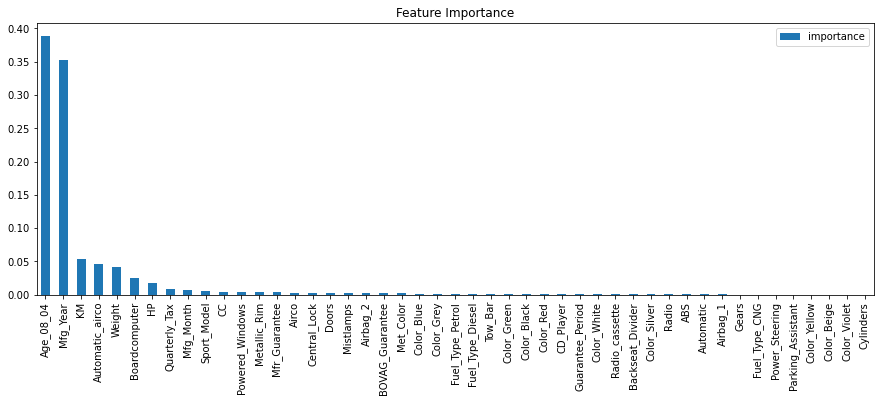

In [ ]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance')

In [ ]:
# Select the 25 most importance features
train_X_scale_imp = train_X_scale[feature_importances.index[range(25)]]
train_X_scale_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_08_04         1005 non-null   float64
 1   Mfg_Year          1005 non-null   float64
 2   KM                1005 non-null   float64
 3   Automatic_airco   1005 non-null   float64
 4   Weight            1005 non-null   float64
 5   Boardcomputer     1005 non-null   float64
 6   HP                1005 non-null   float64
 7   Quarterly_Tax     1005 non-null   float64
 8   Mfg_Month         1005 non-null   float64
 9   Sport_Model       1005 non-null   float64
 10  CC                1005 non-null   float64
 11  Powered_Windows   1005 non-null   float64
 12  Metallic_Rim      1005 non-null   float64
 13  Mfr_Guarantee     1005 non-null   float64
 14  Airco             1005 non-null   float64
 15  Central_Lock      1005 non-null   float64
 16  Doors             1005 non-null   float64


In [ ]:
test_X_scale_imp = test_X_scale[feature_importances.index[range(25)]]
test_X_scale_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_08_04         431 non-null    float64
 1   Mfg_Year          431 non-null    float64
 2   KM                431 non-null    float64
 3   Automatic_airco   431 non-null    float64
 4   Weight            431 non-null    float64
 5   Boardcomputer     431 non-null    float64
 6   HP                431 non-null    float64
 7   Quarterly_Tax     431 non-null    float64
 8   Mfg_Month         431 non-null    float64
 9   Sport_Model       431 non-null    float64
 10  CC                431 non-null    float64
 11  Powered_Windows   431 non-null    float64
 12  Metallic_Rim      431 non-null    float64
 13  Mfr_Guarantee     431 non-null    float64
 14  Airco             431 non-null    float64
 15  Central_Lock      431 non-null    float64
 16  Doors             431 non-null    float64
 1

## 2. Predictive Modeling

In this section, we use neural network model to predict the price of used Toyota Corolla.

In [ ]:
from sklearn import neural_network

### 2.1. Train an ANN Model Using All Features

In [ ]:
# Specify an ANN model, use 1 hidden layer with 20 nodes
ann1 = neural_network.MLPRegressor(alpha=1e-5,
                                   hidden_layer_sizes=(20),
                                   random_state=1)

In [ ]:
ann1.fit(train_X_scale, train_y_scale)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Now, let's evaluate Model 1.

In [ ]:
from sklearn import metrics

In [ ]:
# Predict on test set
pred_y1 = ann1.predict(test_X_scale)
pd.Series(pred_y1).describe()

count    431.000000
mean       0.238800
std        0.145629
min       -0.161773
25%        0.135447
50%        0.219989
75%        0.301386
max        0.790562
dtype: float64

We notice that the predicted price is in the normalized scale. We can convert it back to the original scale.

In [ ]:
pred_y1_raw = train_scale_y.inverse_transform(pred_y1.reshape(-1,1))
pred_y1_raw = pd.Series(pred_y1_raw.reshape(pred_y1.shape[0],))
pred_y1_raw.describe()

count      431.000000
mean     11072.226902
std       4099.442391
min       -203.913605
25%       8162.823071
50%      10542.690358
75%      12834.020438
max      26604.307688
dtype: float64

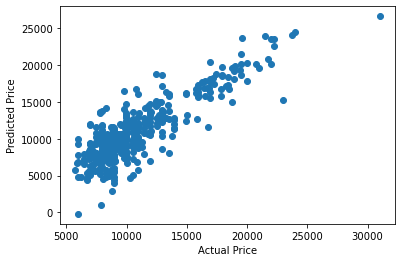

In [ ]:
plt.scatter(test_y, pred_y1_raw)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

From the above plot, we can see that the predicted price is related to the actual price in the test dataset. But there are some errors.

Now, let's calculate some performance metrics.

In [ ]:
# Calculate MAE
metrics.mean_absolute_error(test_y, pred_y1_raw)

1629.033121343838

In [ ]:
# Calculate R squared
metrics.r2_score(test_y, pred_y1_raw)

0.6672406848396826

In [ ]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y, pred_y1_raw)

4605837.567506374

In [ ]:
# Calculate RMSE 
import numpy as np
np.sqrt(((test_y-pred_y1_raw) ** 2).mean())

7052.148335734044

### 2.2. Train another ANN Model Using All Features

In [ ]:
# Specify an ANN model, use 3 hidden layers
ann2 = neural_network.MLPRegressor(solver='lbfgs',
                                   alpha=1e-5,
                                   hidden_layer_sizes=(20, 15, 10),
                                   random_state=1)

In [ ]:
ann2.fit(train_X_scale, train_y_scale)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Evaluate Model 2.

In [ ]:
# Predict on test set
pred_y2 = ann2.predict(test_X_scale)
pd.Series(pred_y2).describe()

count    431.000000
mean       0.233317
std        0.129734
min        0.057091
25%        0.153787
50%        0.195097
75%        0.265971
max        0.852813
dtype: float64

In [ ]:
pred_y2_raw = train_scale_y.inverse_transform(pred_y2.reshape(-1,1))
pred_y2_raw = pd.Series(pred_y2_raw.reshape(pred_y2.shape[0],))
pred_y2_raw.describe()

count      431.000000
mean     10917.887514
std       3652.004464
min       5957.100434
25%       8679.092737
50%       9841.987930
75%      11837.086842
max      28356.690580
dtype: float64

Text(0, 0.5, 'Predicted Price')

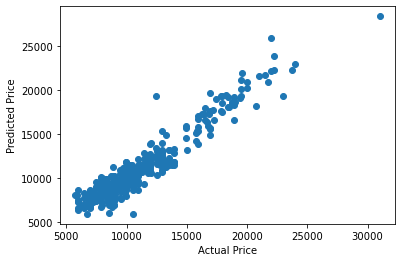

In [ ]:
plt.scatter(test_y, pred_y2_raw)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

From the above plot, we can see that the predicted price is more close to the actual price than as in model 1. The prediction error of this model is less than that of the model 1.

Now, let's calculate some performance metrics.

In [ ]:
# Calculate MAE
metrics.mean_absolute_error(test_y, pred_y2_raw)

821.9672462673764

In [ ]:
# Calculate R squared
metrics.r2_score(test_y, pred_y2_raw)

0.9111003827010266

In [ ]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y, pred_y2_raw)

1230490.563112508

In [ ]:
# Calculate RMSE 
import numpy as np
np.sqrt(((test_y-pred_y2_raw) ** 2).mean())

6861.489378248741

### 2.3. Train another ANN Model Using Important Features

In [ ]:
# Specify an ANN model, use 3 hidden layers
ann3 = neural_network.MLPRegressor(solver='lbfgs',
                                   alpha=1e-5,
                                   hidden_layer_sizes=(20, 15, 10),
                                   random_state=1)

In [ ]:
ann3.fit(train_X_scale_imp, train_y_scale)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 15, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Evaluate Model 3.

In [ ]:
# Predict on test set
pred_y3 = ann3.predict(test_X_scale_imp)
pd.Series(pred_y3).describe()

count    431.000000
mean       0.233286
std        0.126337
min        0.062617
25%        0.146739
50%        0.193762
75%        0.270359
max        0.898416
dtype: float64

In [ ]:
pred_y3_raw = train_scale_y.inverse_transform(pred_y3.reshape(-1,1))
pred_y3_raw = pd.Series(pred_y3_raw.reshape(pred_y3.shape[0],))
pred_y3_raw.describe()

count      431.000000
mean     10916.995797
std       3556.376039
min       6112.681989
25%       8480.708522
50%       9804.406404
75%      11960.603107
max      29640.419326
dtype: float64

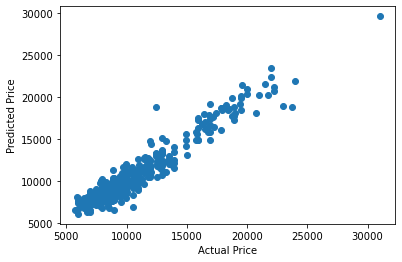

In [ ]:
plt.scatter(test_y, pred_y3_raw)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
# Calculate MAE
metrics.mean_absolute_error(test_y, pred_y3_raw)

825.6122245445783

In [ ]:
# Calculate R squared
metrics.r2_score(test_y, pred_y3_raw)

0.9160372208877865

In [ ]:
metrics.r2_score(test_y_scale, pred_y3)

0.9160372208877865

In [ ]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y, pred_y3_raw)

1162158.0664720333

In [ ]:
# Calculate RMSE 
import numpy as np
np.sqrt(((test_y-pred_y3_raw) ** 2).mean())

6840.124931739464

### 3.5. Compare Two Models

In [ ]:
hid = ['20','20-15-10','20-15-10']

fsec = [False, False, True]

mae = [metrics.mean_absolute_error(test_y, pred_y1_raw),
       metrics.mean_absolute_error(test_y, pred_y2_raw),
       metrics.mean_absolute_error(test_y, pred_y3_raw)]

r2 = [metrics.r2_score(test_y, pred_y1_raw),
      metrics.r2_score(test_y, pred_y2_raw),
      metrics.r2_score(test_y, pred_y3_raw)]
mse = [metrics.regression.mean_squared_error(test_y, pred_y1_raw),
       metrics.regression.mean_squared_error(test_y, pred_y2_raw),
       metrics.regression.mean_squared_error(test_y, pred_y3_raw)]

rmse =[np.sqrt(((test_y-pred_y1_raw) ** 2).mean()),
       np.sqrt(((test_y-pred_y2_raw) ** 2).mean()),
       np.sqrt(((test_y-pred_y3_raw) ** 2).mean())] 

In [ ]:
pd.DataFrame({'Feature Selection': fsec,
              'Hidden Layers':hid,
              'MAE':mae, 'R2':r2, 
              'MSE':mse, 'RMSE':rmse},
            index = ['Model 1','Model 2','Model 3'])

,Feature Selection,Hidden Layers,MAE,R2,MSE,RMSE
Model 1,False,20,1629.033121,0.667241,4.605838e+06,7052.148336
Model 2,False,20-15-10,821.967246,0.911100,1.230491e+06,6861.489378
Model 3,True,20-15-10,825.612225,0.916037,1.162158e+06,6840.124932


From the above comparison, we can see that model 2 with 3 hidden layers has a better performance than model 1 with 1 hidden layer.

By selecting the most important features via random forests, model 3 has a slightly better performance than model 2 in terms of RMSE and R2. 

Please notice that the predicted price is scaled. If we need the unscaled price, we need to convert it back to the original scale.